## **BIG DATA PROCESSING AND ANALYTICS FOCUSING ON CUSTOMERS, SALES AND PRODUCTS**

                      

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **INSTALLING LIBRARIES**

In [ ]:
# Installing the latest version of PySpark
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=578aca005089fbfa4b2e125e91beaf41629ea17f8e6bcaad061179449d7ed0c8
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
# Installation of the "py4j" which is a dependency for PySpark
!pip install py4j

In [ ]:
# Install "findspark", which is a utility for locating the Spark installation and making it accessible in your Python environment
!pip install findspark

In [ ]:
# Note: pyarrow is a library for working with Arrow data, a columnar in-memory analytics layer
import findspark
findspark.init()

In [ ]:
#  Importing the SparkSession class from the pyspark.sql module.
from pyspark.sql import SparkSession

In [ ]:
# Creating a SparkSession
spark = SparkSession.builder.getOrCreate()
# Create a Spark session
spark = SparkSession.builder.appName("example").getOrCreate()

In [ ]:
# Importing the Pandas and NumPy libraries in Python
import pandas as pd
import numpy as np

In [ ]:
# Importing LabelEncoder from scikit-learn preprocessing module
from sklearn.preprocessing import LabelEncoder

# Creating an instance of LabelEncoder for encoding categorical variables
label_encoder = LabelEncoder()

In [ ]:
#  Importing seaborn for statistical data visualization
import seaborn as sns
# Importing matplotlib.pyplot for creating visualizations
import matplotlib.pyplot as plt


In [ ]:
# Importing SparkSession from pyspark.sql to create a Spark application
from pyspark.sql import SparkSession

## Importing the col function from pyspark.sql.functions for column operations
from pyspark.sql.functions import col


In [ ]:
# Importing SparkSession from pyspark.sql to create a Spark application
# Importing col and renaming the sum function as spark_sum from pyspark.sql.functions for column operations
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as spark_sum

In [ ]:
# Importing the mean function from pyspark.sql.functions for calculating the mean in Spark DataFrame operations
from pyspark.sql.functions import mean

In [ ]:
# Importing the functions module from PySpark SQL
from pyspark.sql import functions as F

In [ ]:
from pyspark.sql.functions import col, year, current_date
from pyspark.sql.functions import year, current_date

In [ ]:
# Importing the VectorAssembler class from PySpark's machine learning feature module
from pyspark.ml.feature import VectorAssembler

In [ ]:
# Importing the LinearRegression class from PySpark's machine learning regression module
from pyspark.ml.regression import LinearRegression

In [ ]:
# Importing the RegressionEvaluator class from PySpark's machine learning evaluation module
from pyspark.ml.evaluation import RegressionEvaluator

## **IMPORTING DATASETS**

In [ ]:

# importing dataset ,reading "DimGeography.csv" into a Spark DataFrame df1.
df1= spark.read.csv("/content/drive/MyDrive/Colab Notebooks/DimGeography.csv",header=True, inferSchema=True)

In [ ]:
# Displaying the first 6 rows of the Spark DataFrame df1,"DimGeography.csv"
df1.show(6)


+------------+-------------+-----------------+-----------------+-----------------+------------------------+------------------------+-----------------------+----------+-----------------+----------------+
|GeographyKey|         City|StateProvinceCode|StateProvinceName|CountryRegionCode|EnglishCountryRegionName|SpanishCountryRegionName|FrenchCountryRegionName|PostalCode|SalesTerritoryKey|IpAddressLocator|
+------------+-------------+-----------------+-----------------+-----------------+------------------------+------------------------+-----------------------+----------+-----------------+----------------+
|           1|   Alexandria|              NSW|  New South Wales|               AU|               Australia|               Australia|              Australie|      2015|                9|    198.51.100.2|
|           2|Coffs Harbour|              NSW|  New South Wales|               AU|               Australia|               Australia|              Australie|      2450|                9|   

In [ ]:
# importing dataset ,reading "FactInternetSales.csv" into a Spark DataFrame df1.
df2= spark.read.csv("/content/drive/MyDrive/Colab Notebooks/FactInternetSales.csv",header=True, inferSchema=True)

In [ ]:
# Displaying the first 6 rows of the Spark DataFrame df2,"FactInternetSales.csv"
df2.show(6)


+----------+------------+----------+-----------+-----------+------------+-----------+-----------------+----------------+--------------------+--------------+-------------+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+---------------------+----------------+-------------------+-------------------+-------------------+
|ProductKey|OrderDateKey|DueDateKey|ShipDateKey|CustomerKey|PromotionKey|CurrencyKey|SalesTerritoryKey|SalesOrderNumber|SalesOrderLineNumber|RevisionNumber|OrderQuantity|UnitPrice|ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost|TotalProductCost|SalesAmount|  TaxAmt|Freight|CarrierTrackingNumber|CustomerPONumber|          OrderDate|            DueDate|           ShipDate|
+----------+------------+----------+-----------+-----------+------------+-----------+-----------------+----------------+--------------------+--------------+-------------+---------+--------------+-----------

In [ ]:

# importing dataset ,reading "DimCustomer.csv" into a Spark DataFrame df3.
df3= spark.read.csv("/content/drive/MyDrive/Colab Notebooks/DimCustomer.csv",header=True, inferSchema=True)

In [ ]:
# Displaying the first 6 rows of the Spark DataFrame df2,"FactInternetSales.csv"
df3.show(6)


+-----------+------------+--------------------+-----+---------+----------+--------+---------+----------+-------------+------+------+--------------------+------------+-------------+--------------------+----------------+----------------+---------------+-----------------+-----------------+----------------+--------------+---------------+-------------------+------------+-------------------+-----------------+---------------+
|CustomerKey|GeographyKey|CustomerAlternateKey|Title|FirstName|MiddleName|LastName|NameStyle| BirthDate|MaritalStatus|Suffix|Gender|        EmailAddress|YearlyIncome|TotalChildren|NumberChildrenAtHome|EnglishEducation|SpanishEducation|FrenchEducation|EnglishOccupation|SpanishOccupation|FrenchOccupation|HouseOwnerFlag|NumberCarsOwned|       AddressLine1|AddressLine2|              Phone|DateFirstPurchase|CommuteDistance|
+-----------+------------+--------------------+-----+---------+----------+--------+---------+----------+-------------+------+------+--------------------+-

In [ ]:
# importing dataset ,reading "DimProducts.csv" into a Spark DataFrame df4.
df4= spark.read.csv("/content/drive/MyDrive/Colab Notebooks/DimProduct.csv",header=True, inferSchema=True)

In [ ]:
# Displaying the first 6 rows of the Spark DataFrame df4,"DimProduct.csv"
df4.show(6)


+-----------+------------+--------------------+-----+---------+----------+--------+---------+----------+-------------+------+------+--------------------+------------+-------------+--------------------+----------------+----------------+---------------+-----------------+-----------------+----------------+--------------+---------------+-------------------+------------+-------------------+-----------------+---------------+
|CustomerKey|GeographyKey|CustomerAlternateKey|Title|FirstName|MiddleName|LastName|NameStyle| BirthDate|MaritalStatus|Suffix|Gender|        EmailAddress|YearlyIncome|TotalChildren|NumberChildrenAtHome|EnglishEducation|SpanishEducation|FrenchEducation|EnglishOccupation|SpanishOccupation|FrenchOccupation|HouseOwnerFlag|NumberCarsOwned|       AddressLine1|AddressLine2|              Phone|DateFirstPurchase|CommuteDistance|
+-----------+------------+--------------------+-----+---------+----------+--------+---------+----------+-------------+------+------+--------------------+-

In [ ]:
# importing dataset ,reading "FactSalesTargets.csv" into a Spark DataFrame df5.
df5= spark.read.csv("/content/drive/MyDrive/Colab Notebooks/FactSalesTargets.csv",header=True, inferSchema=True)

In [ ]:
# Displaying the first 6 rows of the Spark DataFrame df4,"DimProduct.csv"
df5.show(5)


+---+-----------------+--------------------+-------------------+---------------------+------------+----------+----------------+
|Row|SalesTerritoryKey|SalesTerritoryRegion|SalesTerritoryGroup|SalesTerritoryCountry|CalendarYear|   DateKey|SalesAmountQuote|
+---+-----------------+--------------------+-------------------+---------------------+------------+----------+----------------+
|  1|                1|           Northwest|      North America|        United States|        2006|01/01/2006|         2693000|
|  2|                1|           Northwest|      North America|        United States|        2007|01/01/2007|         4102000|
|  3|                1|           Northwest|      North America|        United States|        2008|01/01/2008|         2321000|
|  4|                1|           Northwest|      North America|        United States|        2005|01/01/2005|         1213000|
|  5|                2|           Northeast|      North America|        United States|        2005|01/01

## **JOINING THE DATASETS**

In [ ]:
# Joining datasets for DimCustomer(df3) and FactInternetSales(df2) based on the common column CustomerKey
df_23 = df2.join(df3, on="CustomerKey", how="left")

In [ ]:
# Displaying the first 6 rows of the Spark DataFrame df_23,DimCustomer(df3) and FactInternetSales(df2)
df_23.show(6)

+-----------+----------+------------+----------+-----------+------------+-----------+-----------------+----------------+--------------------+--------------+-------------+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+---------------------+----------------+-------------------+-------------------+-------------------+------------+--------------------+-----+---------+----------+--------+---------+----------+-------------+------+------+--------------------+------------+-------------+--------------------+----------------+--------------------+---------------+-----------------+-----------------+----------------+--------------+---------------+--------------------+------------+-------------------+-----------------+---------------+
|CustomerKey|ProductKey|OrderDateKey|DueDateKey|ShipDateKey|PromotionKey|CurrencyKey|SalesTerritoryKey|SalesOrderNumber|SalesOrderLineNumber|RevisionNumber|OrderQuantity|UnitPrice|ExtendedA

In [ ]:
# Joining datasets for DimProduct and FactInternetSales based on the common column 'ProductKey'
df_24 = df2.join(df4, on="ProductKey", how="left")

In [ ]:
# Displaying the first 6 rows of the Spark DataFrame df_24,DimProduct df4 and FactInternetSales df
df_24.show(6)

+----------+------------+----------+-----------+-----------+------------+-----------+-----------------+----------------+--------------------+--------------+-------------+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+---------------------+----------------+-------------------+-------------------+-------------------+-------------------+---------------------+---------------------+-------------------+--------------------+--------------------+--------------------+------------+-----------------+------+----------------+------------+---------+----+---------+------+-----------------+-----------+-----------+-----+-----+------------+--------------------+----------------+----------------+------+
|ProductKey|OrderDateKey|DueDateKey|ShipDateKey|CustomerKey|PromotionKey|CurrencyKey|SalesTerritoryKey|SalesOrderNumber|SalesOrderLineNumber|RevisionNumber|OrderQuantity|UnitPrice|ExtendedAmount|UnitPriceDiscountPct|DiscountAmo

In [ ]:
# Joining datasets for FactInternetSales(df2) and FactSalesTargets(df5) based on the common column SalesTerritoryKey
df_25 = df2.join(df5, on="SalesTerritoryKey", how="left")

In [ ]:
# Displaying the first 6 rows of the Spark DataFrame FactInternetSales(df2) and FactSalesTargets(df5)
df_25.show(6)

+-----------------+----------+------------+----------+-----------+-----------+------------+-----------+----------------+--------------------+--------------+-------------+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+---------------------+----------------+-------------------+-------------------+-------------------+---+--------------------+-------------------+---------------------+------------+----------+----------------+
|SalesTerritoryKey|ProductKey|OrderDateKey|DueDateKey|ShipDateKey|CustomerKey|PromotionKey|CurrencyKey|SalesOrderNumber|SalesOrderLineNumber|RevisionNumber|OrderQuantity|UnitPrice|ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost|TotalProductCost|SalesAmount|  TaxAmt|Freight|CarrierTrackingNumber|CustomerPONumber|          OrderDate|            DueDate|           ShipDate|Row|SalesTerritoryRegion|SalesTerritoryGroup|SalesTerritoryCountry|CalendarYear|   DateKey|SalesAmo

In [ ]:
# Counting the number of columns in the PySpark DataFrame df_25
len(df_25.columns)

33

In [ ]:
# Counting the number of rows in the Spark DataFrame df_24
df_25.count()

191188

In [ ]:
# Joining datasets for DimCustomer,df3 and df_24(DimProduct,df4 and FactInternetSales,df2) based on 'CustomerKey'
df_234 = df_24.join(df3, on="CustomerKey", how="left")

In [ ]:
# Displaying the first 6 rows of the Spark DataFrame df_234,FactInternetSales(df2),DimCustomer(df3) and DimProduct(df4)
df_234.show(6)

+-----------+----------+------------+----------+-----------+------------+-----------+-----------------+----------------+--------------------+--------------+-------------+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+--------+-------+---------------------+----------------+-------------------+-------------------+-------------------+-------------------+---------------------+---------------------+-------------------+--------------------+--------------------+--------------------+------------+-----------------+------+----------------+------------+---------+----+---------+------+-----------------+-----------+-----------+-----+-----+------------+--------------------+----------------+----------------+------+------------+--------------------+-----+---------+----------+--------+---------+----------+-------------+------+------+--------------------+------------+-------------+--------------------+----------------+--------------------+--

In [ ]:
# Counting the number of columns in the PySpark  DataFrame df_234,FactInternetSales(df2),DimCustomer(df3) and DimProduct(df4)
len(df_234.columns)

80

In [ ]:
# Counting the number of rows in the PySpark  DataFrame df_234,FactInternetSales(df2),DimCustomer(df3) and DimProduct(df4)
df_234.count()

60398

## **EXPLORING THE SCHEMA FOR THE DATASETS**

In [ ]:
# Displaying the schema of the PySpark DataFrame df1
df1.printSchema()




root
 |-- ProductKey: integer (nullable = true)
 |-- OrderDateKey: integer (nullable = true)
 |-- DueDateKey: integer (nullable = true)
 |-- ShipDateKey: integer (nullable = true)
 |-- CustomerKey: integer (nullable = true)
 |-- PromotionKey: integer (nullable = true)
 |-- CurrencyKey: integer (nullable = true)
 |-- SalesTerritoryKey: integer (nullable = true)
 |-- SalesOrderNumber: string (nullable = true)
 |-- SalesOrderLineNumber: integer (nullable = true)
 |-- RevisionNumber: integer (nullable = true)
 |-- OrderQuantity: integer (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- ExtendedAmount: double (nullable = true)
 |-- UnitPriceDiscountPct: integer (nullable = true)
 |-- DiscountAmount: integer (nullable = true)
 |-- ProductStandardCost: double (nullable = true)
 |-- TotalProductCost: double (nullable = true)
 |-- SalesAmount: double (nullable = true)
 |-- TaxAmt: double (nullable = true)
 |-- Freight: double (nullable = true)
 |-- CarrierTrackingNumber: string (n

In [ ]:
# Displaying the schema of the PySpark DataFrame df2
df2.printSchema()

root
 |-- ProductKey: integer (nullable = true)
 |-- OrderDateKey: integer (nullable = true)
 |-- DueDateKey: integer (nullable = true)
 |-- ShipDateKey: integer (nullable = true)
 |-- CustomerKey: integer (nullable = true)
 |-- PromotionKey: integer (nullable = true)
 |-- CurrencyKey: integer (nullable = true)
 |-- SalesTerritoryKey: integer (nullable = true)
 |-- SalesOrderNumber: string (nullable = true)
 |-- SalesOrderLineNumber: integer (nullable = true)
 |-- RevisionNumber: integer (nullable = true)
 |-- OrderQuantity: integer (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- ExtendedAmount: double (nullable = true)
 |-- UnitPriceDiscountPct: integer (nullable = true)
 |-- DiscountAmount: integer (nullable = true)
 |-- ProductStandardCost: double (nullable = true)
 |-- TotalProductCost: double (nullable = true)
 |-- SalesAmount: double (nullable = true)
 |-- TaxAmt: double (nullable = true)
 |-- Freight: double (nullable = true)
 |-- CarrierTrackingNumber: string (n

In [ ]:
# Displaying the schema of the PySpark DataFrame df3
df3.printSchema()

root
 |-- CustomerKey: integer (nullable = true)
 |-- GeographyKey: integer (nullable = true)
 |-- CustomerAlternateKey: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- FirstName: string (nullable = true)
 |-- MiddleName: string (nullable = true)
 |-- LastName: string (nullable = true)
 |-- NameStyle: boolean (nullable = true)
 |-- BirthDate: date (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- Suffix: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- EmailAddress: string (nullable = true)
 |-- YearlyIncome: integer (nullable = true)
 |-- TotalChildren: integer (nullable = true)
 |-- NumberChildrenAtHome: integer (nullable = true)
 |-- EnglishEducation: string (nullable = true)
 |-- SpanishEducation: string (nullable = true)
 |-- FrenchEducation: string (nullable = true)
 |-- EnglishOccupation: string (nullable = true)
 |-- SpanishOccupation: string (nullable = true)
 |-- FrenchOccupation: string (nullable = true)
 |-- HouseOwner

In [ ]:
# Displaying the schema of the PySpark DataFrame df4
df4.printSchema()


root
 |-- ProductKey: integer (nullable = true)
 |-- ProductAlternateKey: string (nullable = true)
 |-- ProductSubcategoryKey: integer (nullable = true)
 |-- WeightUnitMeasureCode: string (nullable = true)
 |-- SizeUnitMeasureCode: string (nullable = true)
 |-- EnglishProductName: string (nullable = true)
 |-- SpanishProductName: string (nullable = true)
 |-- FrenchProductName: string (nullable = true)
 |-- StandardCost: double (nullable = true)
 |-- FinishedGoodsFlag: boolean (nullable = true)
 |-- Color: string (nullable = true)
 |-- SafetyStockLevel: integer (nullable = true)
 |-- ReorderPoint: integer (nullable = true)
 |-- ListPrice: double (nullable = true)
 |-- Size: string (nullable = true)
 |-- SizeRange: string (nullable = true)
 |-- Weight: double (nullable = true)
 |-- DaysToManufacture: integer (nullable = true)
 |-- ProductLine: string (nullable = true)
 |-- DealerPrice: double (nullable = true)
 |-- Class: string (nullable = true)
 |-- Style: string (nullable = true)
 |-

In [ ]:
# Displaying the schema of the PySpark DataFrame df_23
df_23.printSchema()

root
 |-- CustomerKey: integer (nullable = true)
 |-- ProductKey: integer (nullable = true)
 |-- OrderDateKey: integer (nullable = true)
 |-- DueDateKey: integer (nullable = true)
 |-- ShipDateKey: integer (nullable = true)
 |-- PromotionKey: integer (nullable = true)
 |-- CurrencyKey: integer (nullable = true)
 |-- SalesTerritoryKey: integer (nullable = true)
 |-- SalesOrderNumber: string (nullable = true)
 |-- SalesOrderLineNumber: integer (nullable = true)
 |-- RevisionNumber: integer (nullable = true)
 |-- OrderQuantity: integer (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- ExtendedAmount: double (nullable = true)
 |-- UnitPriceDiscountPct: integer (nullable = true)
 |-- DiscountAmount: integer (nullable = true)
 |-- ProductStandardCost: double (nullable = true)
 |-- TotalProductCost: double (nullable = true)
 |-- SalesAmount: double (nullable = true)
 |-- TaxAmt: double (nullable = true)
 |-- Freight: double (nullable = true)
 |-- CarrierTrackingNumber: string (n

In [ ]:
# Displaying the schema of the PySpark DataFrame  df_25
df_25.printSchema()

root
 |-- SalesTerritoryKey: integer (nullable = true)
 |-- ProductKey: integer (nullable = true)
 |-- OrderDateKey: integer (nullable = true)
 |-- DueDateKey: integer (nullable = true)
 |-- ShipDateKey: integer (nullable = true)
 |-- CustomerKey: integer (nullable = true)
 |-- PromotionKey: integer (nullable = true)
 |-- CurrencyKey: integer (nullable = true)
 |-- SalesOrderNumber: string (nullable = true)
 |-- SalesOrderLineNumber: integer (nullable = true)
 |-- RevisionNumber: integer (nullable = true)
 |-- OrderQuantity: integer (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- ExtendedAmount: double (nullable = true)
 |-- UnitPriceDiscountPct: integer (nullable = true)
 |-- DiscountAmount: integer (nullable = true)
 |-- ProductStandardCost: double (nullable = true)
 |-- TotalProductCost: double (nullable = true)
 |-- SalesAmount: double (nullable = true)
 |-- TaxAmt: double (nullable = true)
 |-- Freight: double (nullable = true)
 |-- CarrierTrackingNumber: string (n

In [ ]:
# Displaying the schema of the PySpark DataFrame  df_234
df_234.printSchema()

root
 |-- CustomerKey: integer (nullable = true)
 |-- ProductKey: integer (nullable = true)
 |-- OrderDateKey: integer (nullable = true)
 |-- DueDateKey: integer (nullable = true)
 |-- ShipDateKey: integer (nullable = true)
 |-- PromotionKey: integer (nullable = true)
 |-- CurrencyKey: integer (nullable = true)
 |-- SalesTerritoryKey: integer (nullable = true)
 |-- SalesOrderNumber: string (nullable = true)
 |-- SalesOrderLineNumber: integer (nullable = true)
 |-- RevisionNumber: integer (nullable = true)
 |-- OrderQuantity: integer (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- ExtendedAmount: double (nullable = true)
 |-- UnitPriceDiscountPct: integer (nullable = true)
 |-- DiscountAmount: integer (nullable = true)
 |-- ProductStandardCost: double (nullable = true)
 |-- TotalProductCost: double (nullable = true)
 |-- SalesAmount: double (nullable = true)
 |-- TaxAmt: double (nullable = true)
 |-- Freight: double (nullable = true)
 |-- CarrierTrackingNumber: string (n

## **EXPLORATORY DATA ANALYSIS**

In [ ]:
# Displaying the column names of the PySpark DataFrame df_234
df_234.columns

['CustomerKey',
 'ProductKey',
 'OrderDateKey',
 'DueDateKey',
 'ShipDateKey',
 'PromotionKey',
 'CurrencyKey',
 'SalesTerritoryKey',
 'SalesOrderNumber',
 'SalesOrderLineNumber',
 'RevisionNumber',
 'OrderQuantity',
 'UnitPrice',
 'ExtendedAmount',
 'UnitPriceDiscountPct',
 'DiscountAmount',
 'ProductStandardCost',
 'TotalProductCost',
 'SalesAmount',
 'TaxAmt',
 'Freight',
 'CarrierTrackingNumber',
 'CustomerPONumber',
 'OrderDate',
 'DueDate',
 'ShipDate',
 'ProductAlternateKey',
 'ProductSubcategoryKey',
 'WeightUnitMeasureCode',
 'SizeUnitMeasureCode',
 'EnglishProductName',
 'SpanishProductName',
 'FrenchProductName',
 'StandardCost',
 'FinishedGoodsFlag',
 'Color',
 'SafetyStockLevel',
 'ReorderPoint',
 'ListPrice',
 'Size',
 'SizeRange',
 'Weight',
 'DaysToManufacture',
 'ProductLine',
 'DealerPrice',
 'Class',
 'Style',
 'ModelName',
 'EnglishDescription',
 'StartDate',
 'EndDate',
 'Status',
 'GeographyKey',
 'CustomerAlternateKey',
 'Title',
 'FirstName',
 'MiddleName',
 'La

In [ ]:
# Getting the number of columns in the PySpark DataFrame df_234
len(df_234.columns)

80

### **CHECKING FOR MISSING VALUES**

In [ ]:
# Calculating the count of null values for each column in the PySpark DataFrame df_234
null_counts = df_234.select([spark_sum(col(column).isNull().cast("int")).alias(column) for column in df_234.columns])
# Showing the null value counts for the first 6 columns
null_counts.show(6)

+-----------+----------+------------+----------+-----------+------------+-----------+-----------------+----------------+--------------------+--------------+-------------+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+------+-------+---------------------+----------------+---------+-------+--------+-------------------+---------------------+---------------------+-------------------+------------------+------------------+-----------------+------------+-----------------+-----+----------------+------------+---------+-----+---------+------+-----------------+-----------+-----------+-----+-----+---------+------------------+---------+-------+------+------------+--------------------+-----+---------+----------+--------+---------+---------+-------------+------+------+------------+------------+-------------+--------------------+----------------+----------------+---------------+-----------------+-----------------+----------------+---------

In [ ]:
# Creating a list of tuples containing column names and their respective count of null values in the PySpark DataFrame df_234
null_counts = [(c, df_234.where(col(c).isNull()).count() ) for c in df_234.columns]
# Displaying the list of tuples, indicating the column names and their corresponding count of null values
null_counts

[('CustomerKey', 0),
 ('ProductKey', 0),
 ('OrderDateKey', 0),
 ('DueDateKey', 0),
 ('ShipDateKey', 0),
 ('PromotionKey', 0),
 ('CurrencyKey', 0),
 ('SalesTerritoryKey', 0),
 ('SalesOrderNumber', 0),
 ('SalesOrderLineNumber', 0),
 ('RevisionNumber', 0),
 ('OrderQuantity', 0),
 ('UnitPrice', 0),
 ('ExtendedAmount', 0),
 ('UnitPriceDiscountPct', 0),
 ('DiscountAmount', 0),
 ('ProductStandardCost', 0),
 ('TotalProductCost', 0),
 ('SalesAmount', 0),
 ('TaxAmt', 0),
 ('Freight', 0),
 ('CarrierTrackingNumber', 0),
 ('CustomerPONumber', 0),
 ('OrderDate', 0),
 ('DueDate', 0),
 ('ShipDate', 0),
 ('ProductAlternateKey', 0),
 ('ProductSubcategoryKey', 0),
 ('WeightUnitMeasureCode', 45193),
 ('SizeUnitMeasureCode', 45193),
 ('EnglishProductName', 0),
 ('SpanishProductName', 13135),
 ('FrenchProductName', 13135),
 ('StandardCost', 0),
 ('FinishedGoodsFlag', 0),
 ('Color', 0),
 ('SafetyStockLevel', 0),
 ('ReorderPoint', 0),
 ('ListPrice', 0),
 ('Size', 37549),
 ('SizeRange', 0),
 ('Weight', 45193),

In [ ]:
# Counting the total number of rows in the PySpark DataFrame df_234
df_234.count()

60398

In [ ]:
# List of columns to be dropped from the PySpark DataFrame df_234
columns_to_drop = ["WeightUnitMeasureCode","SizeUnitMeasureCode","SpanishProductName","FrenchProductName","Size","Weight","Class",
"Style","EndDate","Status","AddressLine2","AddressLine1", "MiddleName","Title","Suffix","Phone","NameStyle","LastName","FirstName",
  "EmailAddress"                ]

# Dropping the specified columns from the PySpark DataFrame df_234
df_234 = df_234.drop(*columns_to_drop)

In [ ]:
# Creating a list of tuples containing column names and corresponding count of null values in df_234
null_counts = [(c, df_234.where(col(c).isNull()).count() ) for c in df_234.columns]
null_counts

[('CustomerKey', 0),
 ('ProductKey', 0),
 ('OrderDateKey', 0),
 ('DueDateKey', 0),
 ('ShipDateKey', 0),
 ('PromotionKey', 0),
 ('CurrencyKey', 0),
 ('SalesTerritoryKey', 0),
 ('SalesOrderNumber', 0),
 ('SalesOrderLineNumber', 0),
 ('RevisionNumber', 0),
 ('OrderQuantity', 0),
 ('UnitPrice', 0),
 ('ExtendedAmount', 0),
 ('UnitPriceDiscountPct', 0),
 ('DiscountAmount', 0),
 ('ProductStandardCost', 0),
 ('TotalProductCost', 0),
 ('SalesAmount', 0),
 ('TaxAmt', 0),
 ('Freight', 0),
 ('CarrierTrackingNumber', 0),
 ('CustomerPONumber', 0),
 ('OrderDate', 0),
 ('DueDate', 0),
 ('ShipDate', 0),
 ('ProductAlternateKey', 0),
 ('ProductSubcategoryKey', 0),
 ('EnglishProductName', 0),
 ('StandardCost', 0),
 ('FinishedGoodsFlag', 0),
 ('Color', 0),
 ('SafetyStockLevel', 0),
 ('ReorderPoint', 0),
 ('ListPrice', 0),
 ('SizeRange', 0),
 ('DaysToManufacture', 0),
 ('ProductLine', 0),
 ('DealerPrice', 0),
 ('ModelName', 0),
 ('EnglishDescription', 0),
 ('StartDate', 0),
 ('GeographyKey', 0),
 ('Customer

In [ ]:
# Calculating and displaying the number of columns in df_234
len(df_234.columns)

60

In [ ]:
# Display the column names of the PySpark DataFrame df_234
df_234.columns

['CustomerKey',
 'ProductKey',
 'OrderDateKey',
 'DueDateKey',
 'ShipDateKey',
 'PromotionKey',
 'CurrencyKey',
 'SalesTerritoryKey',
 'SalesOrderNumber',
 'SalesOrderLineNumber',
 'RevisionNumber',
 'OrderQuantity',
 'UnitPrice',
 'ExtendedAmount',
 'UnitPriceDiscountPct',
 'DiscountAmount',
 'ProductStandardCost',
 'TotalProductCost',
 'SalesAmount',
 'TaxAmt',
 'Freight',
 'CarrierTrackingNumber',
 'CustomerPONumber',
 'OrderDate',
 'DueDate',
 'ShipDate',
 'ProductAlternateKey',
 'ProductSubcategoryKey',
 'EnglishProductName',
 'StandardCost',
 'FinishedGoodsFlag',
 'Color',
 'SafetyStockLevel',
 'ReorderPoint',
 'ListPrice',
 'SizeRange',
 'DaysToManufacture',
 'ProductLine',
 'DealerPrice',
 'ModelName',
 'EnglishDescription',
 'StartDate',
 'GeographyKey',
 'CustomerAlternateKey',
 'BirthDate',
 'MaritalStatus',
 'Gender',
 'YearlyIncome',
 'TotalChildren',
 'NumberChildrenAtHome',
 'EnglishEducation',
 'SpanishEducation',
 'FrenchEducation',
 'EnglishOccupation',
 'SpanishOccup

### **SUMMARY STATISTICS**

In [ ]:
# Getting  summary statistics of the PySpark DataFrame df_234
df_234.describe().show(5)


+-------+------------------+------------------+-------------------+-------------------+--------------------+------------------+-----------------+------------------+----------------+--------------------+--------------+-------------+-----------------+-----------------+--------------------+--------------+-------------------+-----------------+-----------------+------------------+------------------+---------------------+----------------+-------------------+---------------------+--------------------+-----------------+------+------------------+------------------+-----------------+---------+------------------+-----------+------------------+--------------------+--------------------+----------------+------------------+--------------------+-------------+------+------------------+------------------+--------------------+-------------------+--------------------+---------------+-----------------+-----------------+----------------+------------------+------------------+---------------+
|summary|       

## **RESEARCH QUESTIONS**
**Research Question 1: Are There Observable Patterns or Disparities in Sales Based on Gender?**

In [ ]:
# Checking the distribution of customer based on Gender
# Grouping the DataFrame by 'Gender' and calculating the count of each gender
gender_distribution = df_234.groupBy('Gender').agg(F.count('Gender').alias('count'))

gender_distribution.show()


+------+-----+
|Gender|count|
+------+-----+
|     F|30017|
|     M|30381|
+------+-----+



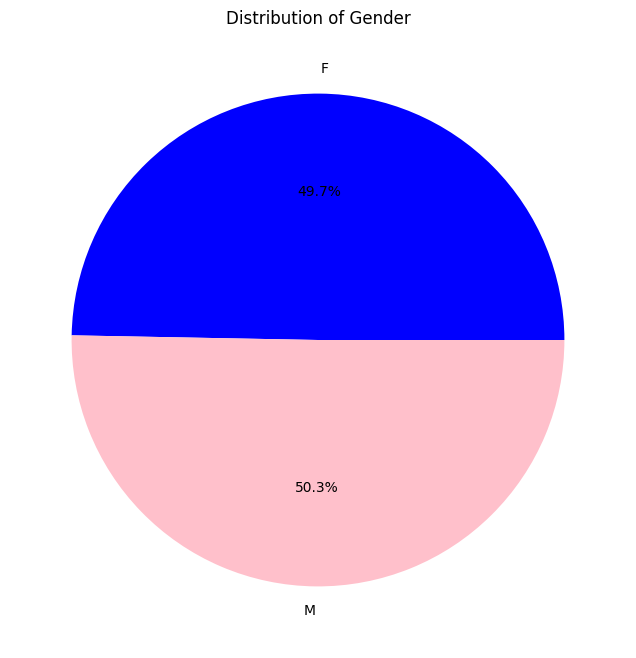

In [ ]:
# Visualize the distribution using a pie chart
gender_distribution_pd = gender_distribution.toPandas()

plt.figure(figsize=(8, 8))
plt.pie(gender_distribution_pd['count'], labels=gender_distribution_pd['Gender'], autopct='%1.1f%%', colors=['blue', 'pink'])
plt.title('Distribution of Gender')
plt.show()

In [ ]:
gender_sales_data = df_234.select('Gender', 'SalesAmount')

# Calculate total sales amount based on gender
gender_sales_trends = gender_sales_data.groupBy('Gender').agg(F.sum('SalesAmount').alias('TotalSales'))

# Display the PySpark DataFrame
print("Gender Sales Trends:")
gender_sales_trends.show()


Gender Sales Trends:
+------+--------------------+
|Gender|          TotalSales|
+------+--------------------+
|     F|1.4813618675202964E7|
|     M|1.4545058545503056E7|
+------+--------------------+



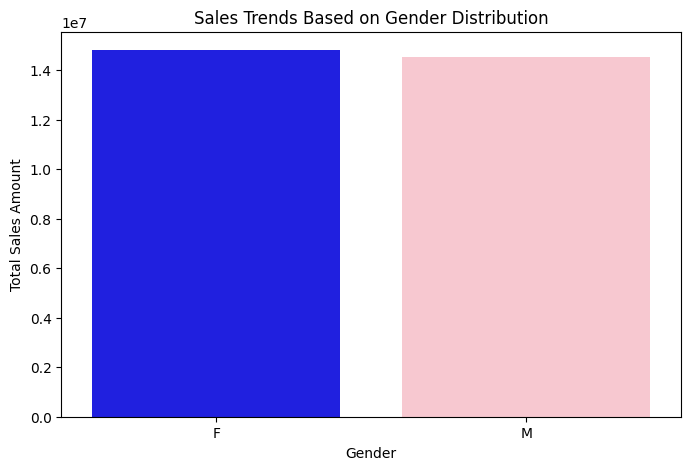

In [ ]:
# Convert to Pandas for visualization
gender_sales_pd = gender_sales_trends.toPandas()

# Plotting bar chart for sales trends based on gender distribution
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='TotalSales', data=gender_sales_pd, palette=['blue', 'pink'])
plt.title('Sales Trends Based on Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Total Sales Amount')
plt.show()

## **Research Question 2**:
**How Does The Distribution Of Customers Based On Marital Status Impact On Sales?**

In [ ]:
# Checking the distribution of customers based on Marital Status
marital_status_distribution = df_234.groupBy('MaritalStatus').agg(F.count('MaritalStatus').alias('count'))

# Show the distribution
marital_status_distribution.show()


+-------------+-----+
|MaritalStatus|count|
+-------------+-----+
|            M|33273|
|            S|27125|
+-------------+-----+



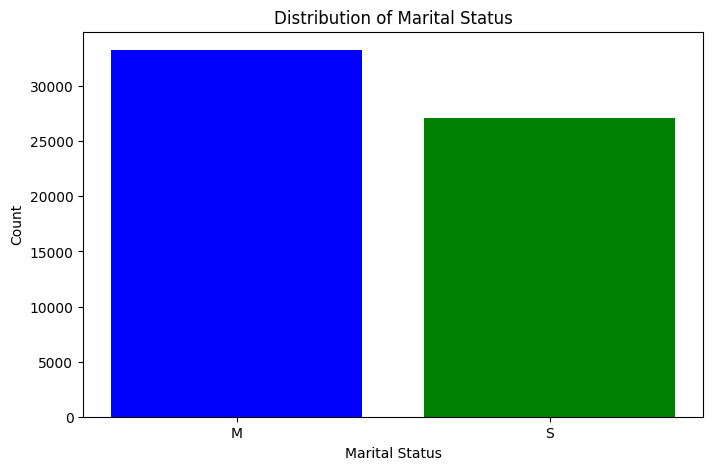

In [ ]:
# Visualize the distribution using a bar chart
marital_status_distribution_pd = marital_status_distribution.toPandas()

plt.figure(figsize=(8, 5))
plt.bar(marital_status_distribution_pd['MaritalStatus'], marital_status_distribution_pd['count'], color=['blue', 'green'])
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status')
plt.show()

In [ ]:
# Analyze purchasing behavior
purchase_behavior = df_234.groupBy('MaritalStatus').agg(F.avg('SalesAmount').alias('AverageSalesAmount'))

# Show the purchasing behavior
purchase_behavior.show()


+-------------+------------------+
|MaritalStatus|AverageSalesAmount|
+-------------+------------------+
|            M|  456.447442034183|
|            S| 522.4442942636923|
+-------------+------------------+



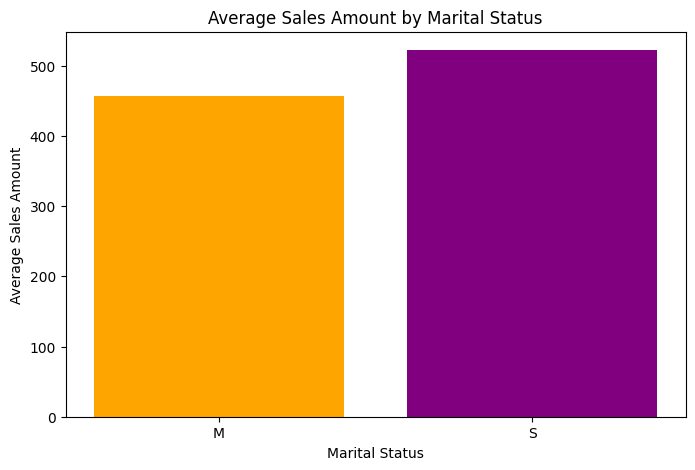

In [ ]:
# Visualize average sales amount by marital status
purchase_behavior_pd = purchase_behavior.toPandas()

plt.figure(figsize=(8, 5))
plt.bar(purchase_behavior_pd['MaritalStatus'], purchase_behavior_pd['AverageSalesAmount'], color=['orange','purple'])
plt.xlabel('Marital Status')
plt.ylabel('Average Sales Amount')
plt.title('Average Sales Amount by Marital Status')
plt.show()

## **Research Question 3**
 **What is the distribution pattern of customers based on their yearly income?**

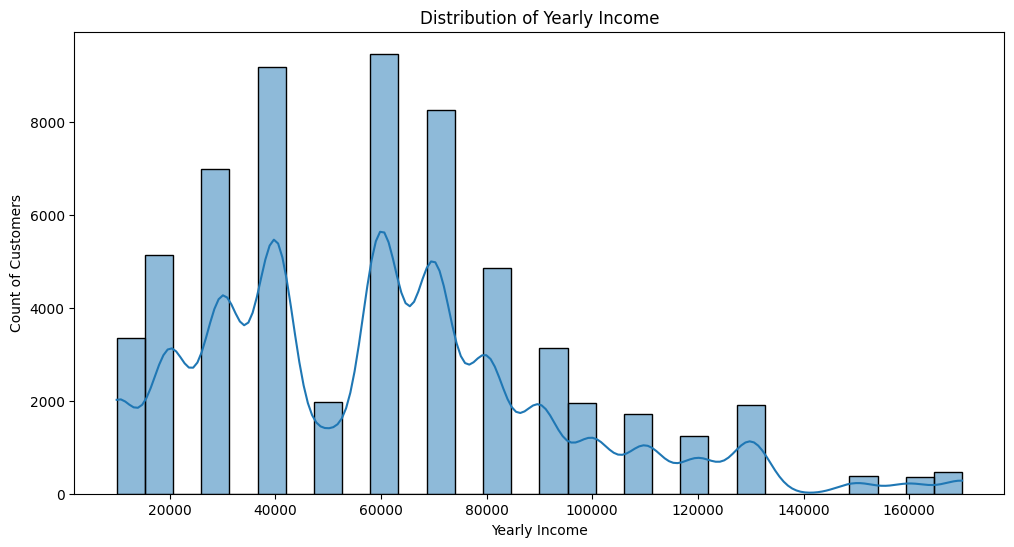

In [ ]:
# Distribution Of Customers Based On Yearly Income
income_distribution = df_234.select('YearlyIncome')

# Using the toPandas() method to convert PySpark DataFrame to Pandas DataFrame for visualization
income_distribution_pd = income_distribution.toPandas()

# Plot the distribution using seaborn and matplotlib
plt.figure(figsize=(12, 6))
sns.histplot(x='YearlyIncome', data=income_distribution_pd, bins=30, kde=True)
plt.title('Distribution of Yearly Income')
plt.xlabel('Yearly Income')
plt.ylabel('Count of Customers')
plt.show()


## **Research Question 4**
**Does The Age Of Customers Influence Their Purchasing Behavior or Exhibit any Correlation With Sales Trends?**

In [ ]:
# Calculating the age based on the 'BirthDate' column
df_234_age = df_234.withColumn('Age', year(current_date()) - year('BirthDate'))

# Grouping by age and getting the total sales for each age group
age_sales_table = df_234_age.groupBy('Age').agg(F.sum('SalesAmount').alias('TotalSales')).orderBy('Age')

# Displaying table
age_sales_table.show(20)


+---+------------------+
|Age|        TotalSales|
+---+------------------+
| 44|291952.07699999737|
| 45| 428675.7978999944|
| 46| 568530.8560999933|
| 47|400885.17789999384|
| 48| 416425.8804999944|
| 49| 622593.4735999908|
| 50|  668520.871799991|
| 51| 959155.3251999898|
| 52|  1076995.38749999|
| 53| 955320.1754999872|
| 54|1274824.8080999868|
| 55|1678163.2954999912|
| 56|1443078.5329999863|
| 57| 1083387.610399987|
| 58| 1117239.640499986|
| 59| 922528.3096999872|
| 60| 860205.9283999893|
| 61| 1138884.940299987|
| 62| 1025142.738099989|
| 63| 876475.0930999897|
+---+------------------+
only showing top 20 rows



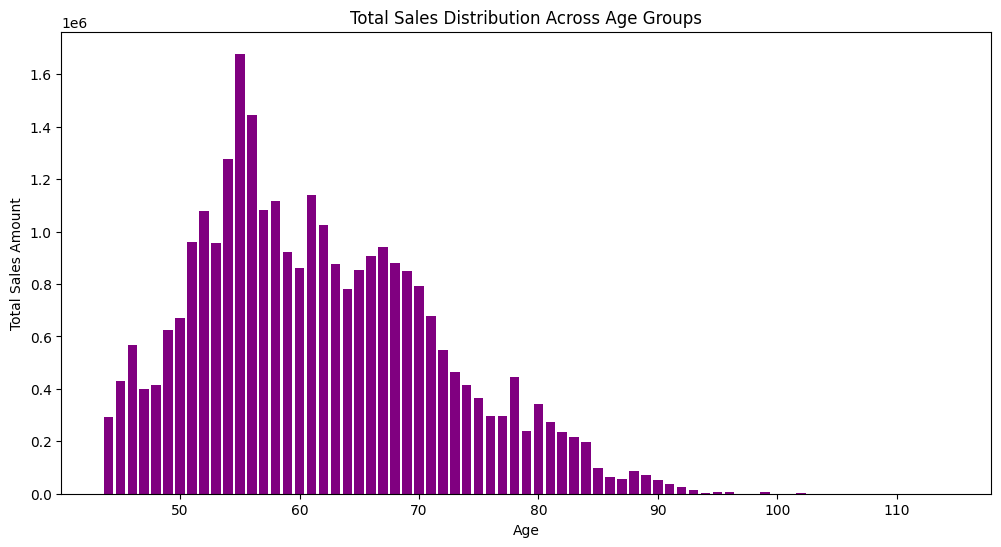

In [ ]:
# Getting age based on the 'BirthDate' column
df_234_age = df_234.withColumn('Age', year(current_date()) - year('BirthDate'))

# Grouping by age and getting the total sales for each age group
age_sales_table = df_234_age.groupBy('Age').agg(F.sum('SalesAmount').alias('TotalSales')).orderBy('Age')

# Convert to Pandas DataFrame for visualization
age_sales_pd = age_sales_table.toPandas()

# Plotting the total sales distribution across age groups
plt.figure(figsize=(12, 6))
plt.bar(age_sales_pd['Age'], age_sales_pd['TotalSales'], color='purple')
plt.title('Total Sales Distribution Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Total Sales Amount')
plt.show()

## **Research Question 5**
 **Does The SalesAmount Exhibit Any Seasonality or Trend Over Time?**

In [ ]:
# Grouping by 'OrderDate' and calculate total sales amount
sales_trends = df_234.groupBy('OrderDate').agg(F.sum('SalesAmount').alias('TotalSales'))
sales_trends.show(5)

# Convert to Pandas for visualization
sales_trends_pd = sales_trends.toPandas()


+-------------------+------------------+
|          OrderDate|        TotalSales|
+-------------------+------------------+
|2011-05-25 00:00:00|10531.529999999999|
|2011-10-10 00:00:00| 36774.33639999999|
|2011-12-04 00:00:00|24666.329999999998|
|2012-01-22 00:00:00|        17007.7424|
|2012-07-11 00:00:00|13254.686300000001|
+-------------------+------------------+
only showing top 5 rows



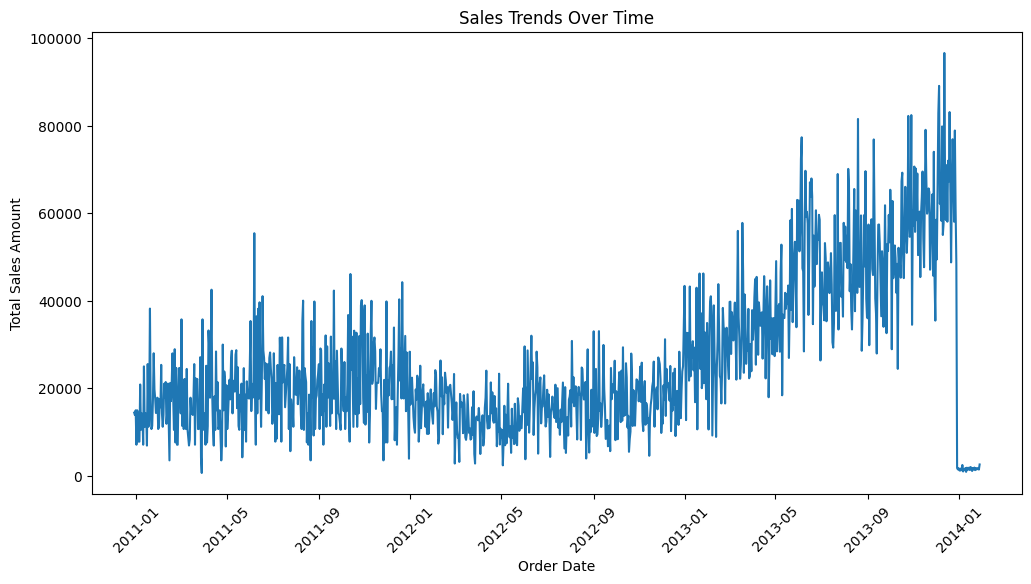

In [ ]:
# Plotting sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='OrderDate', y='TotalSales', data=sales_trends_pd)
plt.title('Sales Trends Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

## **Research Question 6**
**How does the 'SalesAmount' vary across different 'SalesTerritories'?**

In [ ]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Total sales amount for each sales territory region by grouping the data based on the 'SalesTerritoryCountry' column
# and aggregating the sum of 'SalesAmount' within each group.
sales_territory_data = df_25.groupBy('SalesTerritoryCountry').agg(F.sum('SalesAmount').alias('TotalSales'))

# Convert to Pandas for visualization
sales_territory_pd = sales_territory_data.toPandas()

# Display the table
print(sales_territory_pd)


  SalesTerritoryCountry    TotalSales
0               Germany  5.788625e+06
1                France  7.932053e+06
2         United States  3.755916e+07
3                Canada  7.911379e+06
4             Australia  1.812200e+07
5        United Kingdom  1.017514e+07


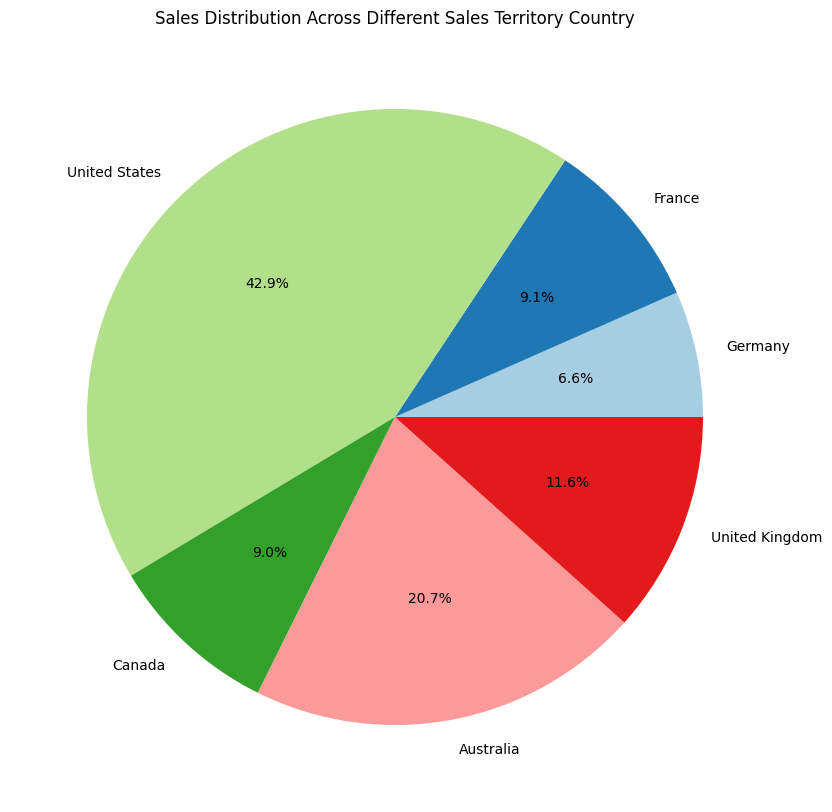

In [ ]:
# Plotting pie chart for sales distribution across different sales territory country
plt.figure(figsize=(10, 10))
plt.pie(sales_territory_pd['TotalSales'], labels=sales_territory_pd['SalesTerritoryCountry'], autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Sales Distribution Across Different Sales Territory Country')
plt.show()


## **Research Question 7**
 **Do Specific Occupations Demonstrate a Significant Impact on Sales?**

In [ ]:
# Group by 'EnglishOccupation' and calculate the average sales amount for each occupation
occupation_sales = df_234.groupBy('EnglishOccupation').agg(F.avg('SalesAmount').alias('AvgSalesAmount'))

# Display the table
occupation_sales.show()


+-----------------+-----------------+
|EnglishOccupation|   AvgSalesAmount|
+-----------------+-----------------+
|       Management|516.1281427695922|
|     Professional|521.6097542038536|
|         Clerical|486.7816545096628|
|           Manual|412.7629828423129|
|   Skilled Manual|451.5869054695701|
+-----------------+-----------------+



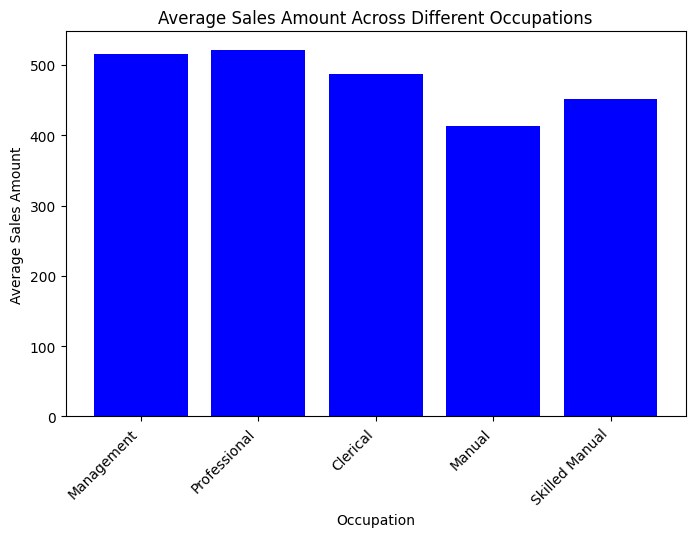

In [ ]:
# Plotting bar chart for average sales amount across different occupations
plt.figure(figsize=(8, 5))
plt.bar(occupation_sales.toPandas()['EnglishOccupation'], occupation_sales.toPandas()['AvgSalesAmount'], color='blue')
plt.title('Average Sales Amount Across Different Occupations')
plt.xlabel('Occupation')
plt.ylabel('Average Sales Amount')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

## **Research Question 8**
**Are there notable variations in sales based on educational backgrounds?**

In [ ]:
# Group by 'EnglishEducation' and calculate the average sales amount for each group
education_sales = df_234.groupBy('EnglishEducation').agg(F.avg('SalesAmount').alias('AvgSalesAmount'))

# Display the table
education_sales.show()

# Convert to Pandas for visualization
education_sales_pd = education_sales.toPandas()


+-------------------+------------------+
|   EnglishEducation|    AvgSalesAmount|
+-------------------+------------------+
|        High School|449.42113067839483|
|Partial High School|347.57970664825416|
|    Graduate Degree| 515.0014383948956|
|    Partial College|464.62990343510825|
|          Bachelors| 545.6427886409828|
+-------------------+------------------+



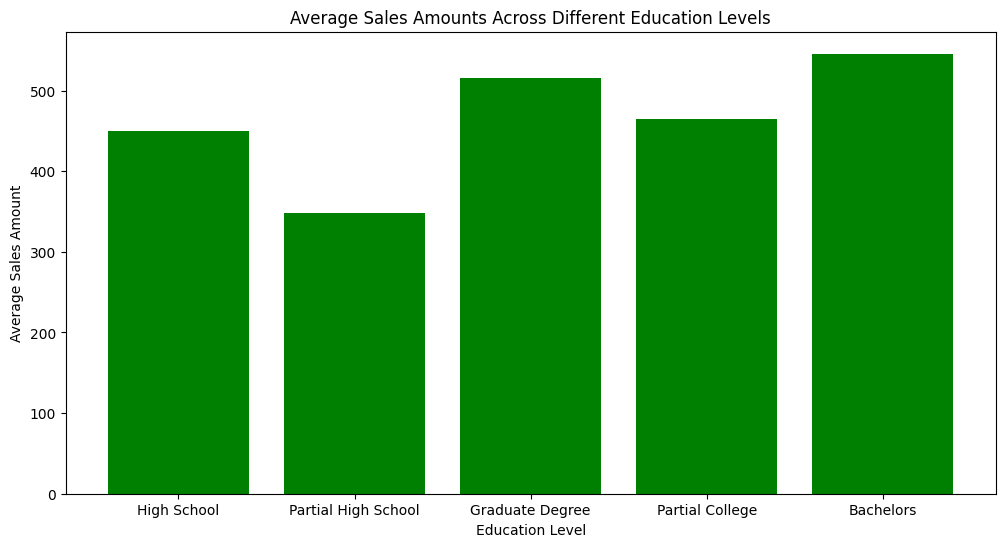

In [ ]:
# Group by 'EnglishEducation' and calculate the average sales amount for each group
education_sales = df_234.groupBy('EnglishEducation').agg(F.avg('SalesAmount').alias('AvgSalesAmount'))

# Convert to Pandas for visualization
education_sales_pd = education_sales.toPandas()

# Plotting grouped bar chart for average sales amounts against the level of education
plt.figure(figsize=(12, 6))
plt.bar(education_sales_pd['EnglishEducation'], education_sales_pd['AvgSalesAmount'], color='green')
plt.title('Average Sales Amounts Across Different Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Average Sales Amount')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()

## **Correlation and Heatmap**

In [ ]:
# Dropping Columns with NaN from the dataframe
# Dropping Columns not needed
columns_to_drop = ["DiscountAmount","UnitPriceDiscountPct","OrderQuantity","RevisionNumber"]

df_234 = df_234.drop(*columns_to_drop)

In [ ]:
# Plotting correlation for the Dataframe
pandas_df = df_234.toPandas()
correlation = pandas_df.select_dtypes('number').corr()
correlation

,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,PromotionKey,CurrencyKey,SalesTerritoryKey,SalesOrderLineNumber,UnitPrice,...,ReorderPoint,ListPrice,DaysToManufacture,DealerPrice,GeographyKey,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned
CustomerKey,1.000000,0.052217,-0.001774,0.001979,-0.001942,0.014025,0.099390,-0.050912,-0.017838,-0.035415,...,0.040816,-0.035415,0.022105,-0.035415,0.092852,-0.079806,-0.027802,-0.055714,-0.121817,-0.011667
ProductKey,0.052217,1.000000,0.231750,0.219959,0.225845,0.020898,-0.001683,-0.023684,-0.248350,-0.142207,...,0.470963,-0.142207,0.005327,-0.142207,0.007588,-0.034132,0.003229,-0.011575,-0.009542,0.005245
OrderDateKey,-0.001774,0.231750,1.000000,0.941479,0.965982,-0.014860,0.110514,-0.055401,0.230817,-0.644948,...,0.075965,-0.644948,-0.499840,-0.644948,0.044184,-0.009209,0.055421,0.034186,-0.000687,0.038661
DueDateKey,0.001979,0.219959,0.941479,1.000000,0.973241,-0.015908,0.108257,-0.051429,0.222521,-0.611970,...,0.072237,-0.611970,-0.474252,-0.611970,0.041829,-0.010903,0.054234,0.034287,-0.000782,0.037766
ShipDateKey,-0.001942,0.225845,0.965982,0.973241,1.000000,-0.015849,0.111758,-0.053084,0.227242,-0.630441,...,0.074087,-0.630441,-0.488618,-0.630441,0.042679,-0.009383,0.058390,0.036510,0.002580,0.039531
PromotionKey,0.014025,0.020898,-0.014860,-0.015908,-0.015849,1.000000,-0.001344,0.002893,-0.025094,0.070681,...,-0.051392,0.070681,0.092957,0.070681,-0.001594,-0.002923,0.000035,-0.003290,-0.004040,-0.010749
CurrencyKey,0.099390,-0.001683,0.110514,0.108257,0.111758,-0.001344,1.000000,-0.434895,0.037910,-0.062022,...,0.012753,-0.062022,-0.040847,-0.062022,0.723662,-0.095634,0.047391,-0.046508,0.033354,-0.134602
SalesTerritoryKey,-0.050912,-0.023684,-0.055401,-0.051429,-0.053084,0.002893,-0.434895,1.000000,-0.008030,0.073906,...,-0.001324,0.073906,0.080685,0.073906,-0.809883,-0.058863,-0.104288,0.138686,-0.043113,0.020182
SalesOrderLineNumber,-0.017838,-0.248350,0.230817,0.222521,0.227242,-0.025094,0.037910,-0.008030,1.000000,-0.430759,...,-0.284590,-0.430759,-0.502167,-0.430759,0.019095,0.020306,0.012885,0.007719,0.005050,-0.005292
UnitPrice,-0.035415,-0.142207,-0.644948,-0.611970,-0.630441,0.070681,-0.062022,0.073906,-0.430759,1.000000,...,-0.113986,1.000000,0.859822,1.000000,-0.049720,0.072382,-0.053461,-0.023700,0.004475,-0.033842


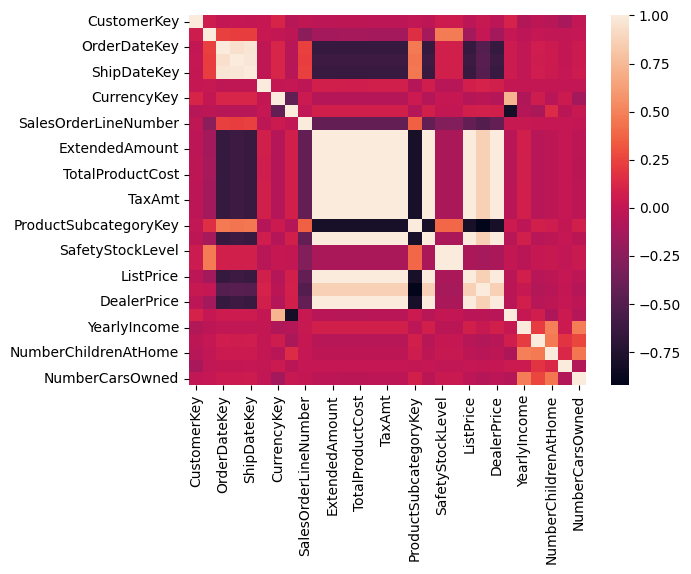

In [ ]:
# Creating a heatmap to visually represent the correlation matrix
sns.heatmap(correlation);

## **LINEAR REGRESSION MODEL**

### **DATA PREPROCESSING**

In [ ]:
# Encoding the Categorical columns into numerical columns
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCols=['MaritalStatus', 'Gender', 'EnglishEducation', 'SpanishEducation', 'FrenchEducation', 'EnglishOccupation', 'SpanishOccupation', 'FrenchOccupation'],
                       outputCols=['MaritalStatus_indexed', 'Gender_indexed', 'EnglishEducation_indexed', 'SpanishEducation_indexed', 'FrenchEducation_indexed', 'EnglishOccupation_indexed',
                                  'SpanishOccupation_indexed', 'FrenchOccupation_indexed'] )

df_234_new = indexer.fit(df_234).transform(df_234)

In [ ]:
df_234_new.show()

+-----------+----------+------------+----------+-----------+------------+-----------+-----------------+----------------+--------------------+---------+--------------+-------------------+----------------+-----------+--------+-------+---------------------+----------------+-------------------+-------------------+-------------------+-------------------+---------------------+--------------------+------------+-----------------+------+----------------+------------+---------+---------+-----------------+-----------+-----------+------------+--------------------+----------------+------------+--------------------+----------+-------------+------+------------+-------------+--------------------+-------------------+--------------------+---------------+-----------------+--------------------+----------------+--------------+---------------+-----------------+---------------+---------------------+--------------+------------------------+------------------------+-----------------------+----------------------

In [ ]:
# Features to train the model, and the target variable
feature_column = ['ProductKey','UnitPrice','TaxAmt','Freight','YearlyIncome','MaritalStatus_indexed', 'Gender_indexed', 'EnglishEducation_indexed', 'SpanishEducation_indexed',
                  'FrenchEducation_indexed', 'EnglishOccupation_indexed', 'SpanishOccupation_indexed', 'FrenchOccupation_indexed']



target_variable = 'SalesAmount'

In [ ]:
# Using VectorAssembler to combine multiple feature columns into a single vector column
features = VectorAssembler(inputCols= ['ProductKey','UnitPrice','TaxAmt','Freight','YearlyIncome','MaritalStatus_indexed', 'Gender_indexed', 'EnglishEducation_indexed', 'SpanishEducation_indexed',
                                      'FrenchEducation_indexed', 'EnglishOccupation_indexed', 'SpanishOccupation_indexed', 'FrenchOccupation_indexed'],
                           outputCol= 'feature_column')

output_column = features.transform(df_234_new)
output_column.show(5)

+-----------+----------+------------+----------+-----------+------------+-----------+-----------------+----------------+--------------------+---------+--------------+-------------------+----------------+-----------+--------+-------+---------------------+----------------+-------------------+-------------------+-------------------+-------------------+---------------------+--------------------+------------+-----------------+------+----------------+------------+---------+---------+-----------------+-----------+-----------+------------+--------------------+----------------+------------+--------------------+----------+-------------+------+------------+-------------+--------------------+----------------+--------------------+---------------+-----------------+-----------------+----------------+--------------+---------------+-----------------+---------------+---------------------+--------------+------------------------+------------------------+-----------------------+-------------------------+--

In [ ]:
# Selecting the 'feature_column' from the DataFrame output_column
output_column.select('feature_column').show()

+--------------------+
|      feature_column|
+--------------------+
|[310.0,3578.27,28...|
|[346.0,3399.99,27...|
|[346.0,3399.99,27...|
|[336.0,699.0982,5...|
|(13,[0,1,2,3,4,5,...|
|[311.0,3578.27,28...|
|(13,[0,1,2,3,4,5]...|
|(13,[0,1,2,3,4,5]...|
|(13,[0,1,2,3,4],[...|
|[312.0,3578.27,28...|
|[312.0,3578.27,28...|
|[330.0,699.0982,5...|
|[313.0,3578.27,28...|
|[314.0,3578.27,28...|
|[314.0,3578.27,28...|
|[311.0,3578.27,28...|
|[310.0,3578.27,28...|
|[311.0,3578.27,28...|
|[314.0,3578.27,28...|
|[311.0,3578.27,28...|
+--------------------+
only showing top 20 rows



In [ ]:

# Displaying target and predictive features
X_y = output_column.select('feature_column', 'SalesAmount')
X_y.show()

+--------------------+-----------+
|      feature_column|SalesAmount|
+--------------------+-----------+
|[310.0,3578.27,28...|    3578.27|
|[346.0,3399.99,27...|    3399.99|
|[346.0,3399.99,27...|    3399.99|
|[336.0,699.0982,5...|   699.0982|
|(13,[0,1,2,3,4,5,...|    3399.99|
|[311.0,3578.27,28...|    3578.27|
|(13,[0,1,2,3,4,5]...|    3578.27|
|(13,[0,1,2,3,4,5]...|    3374.99|
|(13,[0,1,2,3,4],[...|    3399.99|
|[312.0,3578.27,28...|    3578.27|
|[312.0,3578.27,28...|    3578.27|
|[330.0,699.0982,5...|   699.0982|
|[313.0,3578.27,28...|    3578.27|
|[314.0,3578.27,28...|    3578.27|
|[314.0,3578.27,28...|    3578.27|
|[311.0,3578.27,28...|    3578.27|
|[310.0,3578.27,28...|    3578.27|
|[311.0,3578.27,28...|    3578.27|
|[314.0,3578.27,28...|    3578.27|
|[311.0,3578.27,28...|    3578.27|
+--------------------+-----------+
only showing top 20 rows



## **SPLITTING OF DATA FOR TESTING AND TRAINING**

In [ ]:
# Train, Test, Split of Data
train_data, test_data = X_y.randomSplit([0.8, 0.2],  seed=42)

In [ ]:
#  Displaying the first 5 rows of the DataFrame train_data
train_data.show(6)

+--------------------+-----------+
|      feature_column|SalesAmount|
+--------------------+-----------+
|(13,[0,1,2,3,4],[...|      34.99|
|(13,[0,1,2,3,4],[...|      34.99|
|(13,[0,1,2,3,4],[...|      34.99|
|(13,[0,1,2,3,4],[...|      34.99|
|(13,[0,1,2,3,4],[...|      34.99|
|(13,[0,1,2,3,4],[...|      34.99|
+--------------------+-----------+
only showing top 6 rows



In [ ]:
# Displaying the first 5 rows of the DataFrame test_data
test_data.show(6)

+--------------------+-----------+
|      feature_column|SalesAmount|
+--------------------+-----------+
|(13,[0,1,2,3,4],[...|      34.99|
|(13,[0,1,2,3,4],[...|      34.99|
|(13,[0,1,2,3,4],[...|      34.99|
|(13,[0,1,2,3,4],[...|      34.99|
|(13,[0,1,2,3,4],[...|      34.99|
|(13,[0,1,2,3,4],[...|      34.99|
+--------------------+-----------+
only showing top 6 rows



## **MODEL BUILDING**

In [ ]:
# Linear Regression model
lr = LinearRegression(featuresCol= 'feature_column', labelCol= 'SalesAmount')


### **TRAINING THE MODEL**

In [ ]:
# Training of the data
lr = lr.fit(train_data)

In [ ]:
# Accessing the coefficients of the Linear Regression model
lr.coefficients

DenseVector([0.0, 0.3333, 4.1667, 13.3333, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0])

In [ ]:
# Accessing the intercept of the Linear Regression model
lr.intercept

-0.0007042733915351582

## **MODEL EVALUATION**

In [ ]:
# Predicting the model
predicted_values = lr.evaluate(train_data)

In [ ]:
# Showing the predicted values or results

predicted_values.predictions.show()

+--------------------+-----------+------------------+
|      feature_column|SalesAmount|        prediction|
+--------------------+-----------+------------------+
|(13,[0,1,2,3,4],[...|      34.99| 34.99002500298596|
|(13,[0,1,2,3,4],[...|      34.99| 34.99002500298596|
|(13,[0,1,2,3,4],[...|      34.99| 34.99002500298596|
|(13,[0,1,2,3,4],[...|      34.99|34.990030741635344|
|(13,[0,1,2,3,4],[...|      34.99|34.990030741635344|
|(13,[0,1,2,3,4],[...|      34.99|34.990030741635344|
|(13,[0,1,2,3,4],[...|      34.99|34.990030741635344|
|(13,[0,1,2,3,4],[...|      34.99|34.990030741635344|
|(13,[0,1,2,3,4],[...|      34.99|34.990030741635344|
|(13,[0,1,2,3,4],[...|      34.99|34.990030741635344|
|(13,[0,1,2,3,4],[...|      34.99|34.990030741635344|
|(13,[0,1,2,3,4],[...|      34.99|34.990030741635344|
|(13,[0,1,2,3,4],[...|      34.99|34.990030741635344|
|(13,[0,1,2,3,4],[...|      34.99|34.990030741635344|
|(13,[0,1,2,3,4],[...|      34.99|34.990030741635344|
|(13,[0,1,2,3,4],[...|      

## **MODEL EVALUATION**

In [ ]:
# Making prediction on the test data

test_prediction = lr.transform(test_data)

In [ ]:
# Showing predicted values from the test data

test_prediction.show()

+--------------------+-----------+------------------+
|      feature_column|SalesAmount|        prediction|
+--------------------+-----------+------------------+
|(13,[0,1,2,3,4],[...|      34.99| 34.99002500298596|
|(13,[0,1,2,3,4],[...|      34.99|34.990030741635344|
|(13,[0,1,2,3,4],[...|      34.99|34.990030741635344|
|(13,[0,1,2,3,4],[...|      34.99|34.990030741635344|
|(13,[0,1,2,3,4],[...|      34.99|34.990030741635344|
|(13,[0,1,2,3,4],[...|      34.99| 34.99003361096003|
|(13,[0,1,2,3,4],[...|      34.99| 34.99003934960942|
|(13,[0,1,2,3,4],[...|      34.99|34.990025726884156|
|(13,[0,1,2,3,4],[...|      34.99| 34.99003146553354|
|(13,[0,1,2,3,4],[...|      34.99| 34.99003146553354|
|(13,[0,1,2,3,4],[...|      34.99| 34.99003146553354|
|(13,[0,1,2,3,4],[...|      34.99| 34.99003146553354|
|(13,[0,1,2,3,4],[...|      34.99| 34.99003146553354|
|(13,[0,1,2,3,4],[...|      34.99| 34.99003433485823|
|(13,[0,1,2,3,4],[...|      34.99| 34.99003433485823|
|(13,[0,1,2,3,4],[...|      

## **PERFORMANCE METRICS**

In [ ]:
# Evaluate the model using regression metrics
evaluator = RegressionEvaluator(labelCol="SalesAmount", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(test_prediction)
print(f"Root Mean Squared Error (RMSE): {rmse}")

mae_evaluator = RegressionEvaluator(labelCol="SalesAmount", predictionCol="prediction", metricName="mae")
mae = mae_evaluator.evaluate(test_prediction)
print(f"Mean Absolute Error (MAE): {mae}")

r2_evaluator = RegressionEvaluator(labelCol="SalesAmount", predictionCol="prediction", metricName="r2")
r2 = r2_evaluator.evaluate(test_prediction)
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 0.0002127712779754062
Mean Absolute Error (MAE): 0.0001284922177109339
R-squared (R2): 0.999999999999947


## **COMMUNICATING THE RESULT OF THE MODEL**

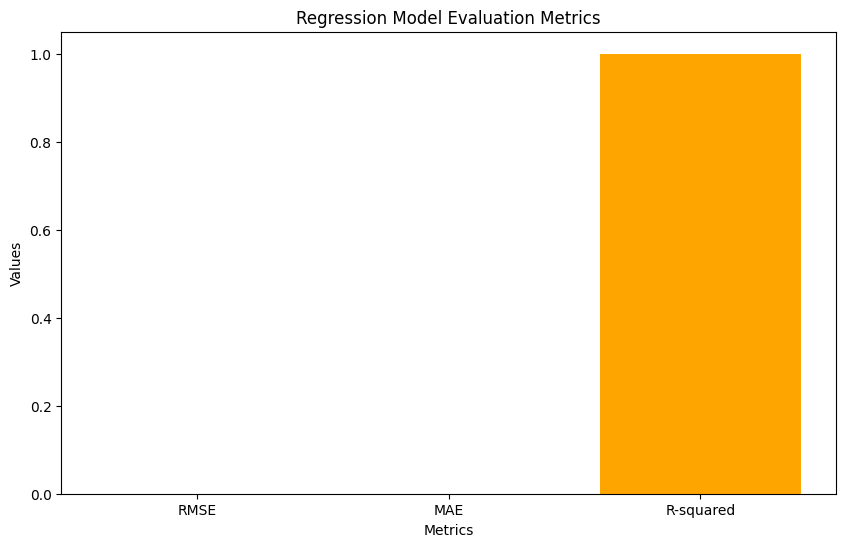

In [ ]:
import matplotlib.pyplot as plt

# Metrics values
metrics = ['RMSE', 'MAE', 'R-squared']
values = [rmse, mae, r2]

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.title('Regression Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

## **CLASSIFICATION BASED MODEL**



## **LOGISTIC REGRESSION**


### **DATA PREPROCESSING**

In [ ]:
# Features to train the model, and the target variable
feature_column = ['ProductKey','UnitPrice','TaxAmt','Freight','YearlyIncome', 'Gender_indexed', 'EnglishEducation_indexed', 'SpanishEducation_indexed',
                  'FrenchEducation_indexed', 'EnglishOccupation_indexed', 'SalesAmount', 'SpanishOccupation_indexed', 'FrenchOccupation_indexed']



target_variable = 'MaritalStatus_indexed'

In [ ]:
# Using VectorAssembler to combine multiple feature columns into a single vector column
feature_column = VectorAssembler(inputCols= ['ProductKey','UnitPrice','TaxAmt','Freight','YearlyIncome', 'Gender_indexed', 'EnglishEducation_indexed', 'SpanishEducation_indexed',
                                      'FrenchEducation_indexed', 'EnglishOccupation_indexed', 'SalesAmount', 'SpanishOccupation_indexed', 'FrenchOccupation_indexed'],
                           outputCol= 'feature_column')

output_column = features.transform(df_234_new)
output_column.show(5)

+-----------+----------+------------+----------+-----------+------------+-----------+-----------------+----------------+--------------------+---------+--------------+-------------------+----------------+-----------+--------+-------+---------------------+----------------+-------------------+-------------------+-------------------+-------------------+---------------------+--------------------+------------+-----------------+------+----------------+------------+---------+---------+-----------------+-----------+-----------+------------+--------------------+----------------+------------+--------------------+----------+-------------+------+------------+-------------+--------------------+----------------+--------------------+---------------+-----------------+-----------------+----------------+--------------+---------------+-----------------+---------------+---------------------+--------------+------------------------+------------------------+-----------------------+-------------------------+--

In [ ]:
# Selecting the 'feature_column' from the DataFrame output_column
output_column.select('feature_column').show()

+--------------------+
|      feature_column|
+--------------------+
|[310.0,3578.27,28...|
|[346.0,3399.99,27...|
|[346.0,3399.99,27...|
|[336.0,699.0982,5...|
|(13,[0,1,2,3,4,5,...|
|[311.0,3578.27,28...|
|(13,[0,1,2,3,4,5]...|
|(13,[0,1,2,3,4,5]...|
|(13,[0,1,2,3,4],[...|
|[312.0,3578.27,28...|
|[312.0,3578.27,28...|
|[330.0,699.0982,5...|
|[313.0,3578.27,28...|
|[314.0,3578.27,28...|
|[314.0,3578.27,28...|
|[311.0,3578.27,28...|
|[310.0,3578.27,28...|
|[311.0,3578.27,28...|
|[314.0,3578.27,28...|
|[311.0,3578.27,28...|
+--------------------+
only showing top 20 rows



In [ ]:
# Displaying target and predictive features
X_y = output_column.select('feature_column', 'MaritalStatus_indexed')
X_y.show()

+--------------------+---------------------+
|      feature_column|MaritalStatus_indexed|
+--------------------+---------------------+
|[310.0,3578.27,28...|                  1.0|
|[346.0,3399.99,27...|                  1.0|
|[346.0,3399.99,27...|                  1.0|
|[336.0,699.0982,5...|                  0.0|
|(13,[0,1,2,3,4,5,...|                  1.0|
|[311.0,3578.27,28...|                  0.0|
|(13,[0,1,2,3,4,5]...|                  1.0|
|(13,[0,1,2,3,4,5]...|                  1.0|
|(13,[0,1,2,3,4],[...|                  0.0|
|[312.0,3578.27,28...|                  1.0|
|[312.0,3578.27,28...|                  1.0|
|[330.0,699.0982,5...|                  0.0|
|[313.0,3578.27,28...|                  1.0|
|[314.0,3578.27,28...|                  0.0|
|[314.0,3578.27,28...|                  1.0|
|[311.0,3578.27,28...|                  0.0|
|[310.0,3578.27,28...|                  1.0|
|[311.0,3578.27,28...|                  0.0|
|[314.0,3578.27,28...|                  0.0|
|[311.0,35

### **SPLITTING OF DATA FOR TRAINING AND TESTING**

In [ ]:
# Train, Test, Split of Data
train_data, test_data = X_y.randomSplit([0.8, 0.2], seed=42)

In [ ]:
#  Displaying the first 5 rows of the DataFrame train_data
train_data.show(5)

+--------------------+---------------------+
|      feature_column|MaritalStatus_indexed|
+--------------------+---------------------+
|(13,[0,1,2,3,4],[...|                  0.0|
|(13,[0,1,2,3,4],[...|                  0.0|
|(13,[0,1,2,3,4],[...|                  0.0|
|(13,[0,1,2,3,4],[...|                  0.0|
|(13,[0,1,2,3,4],[...|                  0.0|
+--------------------+---------------------+
only showing top 5 rows



In [ ]:
# Displaying the first 5 rows of the DataFrame test_data
test_data.show(5)

+--------------------+---------------------+
|      feature_column|MaritalStatus_indexed|
+--------------------+---------------------+
|(13,[0,1,2,3,4],[...|                  0.0|
|(13,[0,1,2,3,4],[...|                  0.0|
|(13,[0,1,2,3,4],[...|                  0.0|
|(13,[0,1,2,3,4],[...|                  0.0|
|(13,[0,1,2,3,4],[...|                  0.0|
+--------------------+---------------------+
only showing top 5 rows



### **MODEL BUILDING**

In [ ]:
# Importing Logistic Regression model library
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [ ]:
# Logistic Regression model
lr_model = LogisticRegression(featuresCol='feature_column', labelCol='MaritalStatus_indexed')
lr_model

LogisticRegression_66b9b087f9ae

## **TRAINING THE MODEL**

In [ ]:
# Training of the data
lr_model = lr_model.fit(train_data)

In [ ]:
# Predicting the Training Data
predicted_result =lr_model.transform(train_data)

# Showing the Predicted results
predicted_result.select('MaritalStatus_indexed', 'prediction', 'probability').show()
#predicted_result.show()

+---------------------+----------+--------------------+
|MaritalStatus_indexed|prediction|         probability|
+---------------------+----------+--------------------+
|                  0.0|       0.0|[0.99999999350553...|
|                  0.0|       0.0|[0.99999999350553...|
|                  0.0|       0.0|[0.99999999350553...|
|                  0.0|       0.0|[0.99999999378671...|
|                  0.0|       0.0|[0.99999999378671...|
|                  0.0|       0.0|[0.99999999378671...|
|                  0.0|       0.0|[0.99999999378671...|
|                  0.0|       0.0|[0.99999999378671...|
|                  0.0|       0.0|[0.99999999378671...|
|                  0.0|       0.0|[0.99999999378671...|
|                  0.0|       0.0|[0.99999999378671...|
|                  0.0|       0.0|[0.99999999378671...|
|                  0.0|       0.0|[0.99999999378671...|
|                  0.0|       0.0|[0.99999999378671...|
|                  0.0|       0.0|[0.99999999378

### **MAKING PREDICTIONS ON TEST DATA**

In [ ]:
# Making Predictions on the test Data
predictions = lr_model.transform(test_data)
predictions.select('MaritalStatus_indexed', 'prediction', 'probability').show()
# predictions.show()

+---------------------+----------+--------------------+
|MaritalStatus_indexed|prediction|         probability|
+---------------------+----------+--------------------+
|                  0.0|       0.0|[0.99999999350553...|
|                  0.0|       0.0|[0.99999999378671...|
|                  0.0|       0.0|[0.99999999378671...|
|                  0.0|       0.0|[0.99999999378671...|
|                  0.0|       0.0|[0.99999999378671...|
|                  0.0|       0.0|[0.99999999392270...|
|                  0.0|       0.0|[0.99999999418582...|
|                  0.0|       0.0|[0.99999999350575...|
|                  0.0|       0.0|[0.99999999378692...|
|                  0.0|       0.0|[0.99999999378692...|
|                  0.0|       0.0|[0.99999999378692...|
|                  0.0|       0.0|[0.99999999378692...|
|                  0.0|       0.0|[0.99999999378692...|
|                  0.0|       0.0|[0.99999999392290...|
|                  0.0|       0.0|[0.99999999392

## **PERFORMANCE METRICS**

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Selecting relevant columns for evaluation
predictions_eval = predictions.select('MaritalStatus_indexed', 'prediction', 'probability')

# Binary Classification Evaluation
binary_evaluator = BinaryClassificationEvaluator(labelCol='MaritalStatus_indexed', rawPredictionCol='probability')
binary_auc = binary_evaluator.evaluate(predictions_eval)
print(f'Area under ROC curve (AUC): {binary_auc}')

# Multiclass Classification Evaluation
multiclass_evaluator = MulticlassClassificationEvaluator(labelCol='MaritalStatus_indexed', metricName='f1')
f1_score = multiclass_evaluator.evaluate(predictions_eval)
print(f'F1 Score: {f1_score}')

# Confusion Matrix
conf_matrix = predictions_eval.groupBy('MaritalStatus_indexed', 'prediction').count()
conf_matrix.show()


Area under ROC curve (AUC): 0.9999999021870581
F1 Score: 1.0
+---------------------+----------+-----+
|MaritalStatus_indexed|prediction|count|
+---------------------+----------+-----+
|                  1.0|       1.0| 5453|
|                  0.0|       0.0| 6562|
+---------------------+----------+-----+



## **COMMUNICATION OF THE RESULT OF THE MODEL**

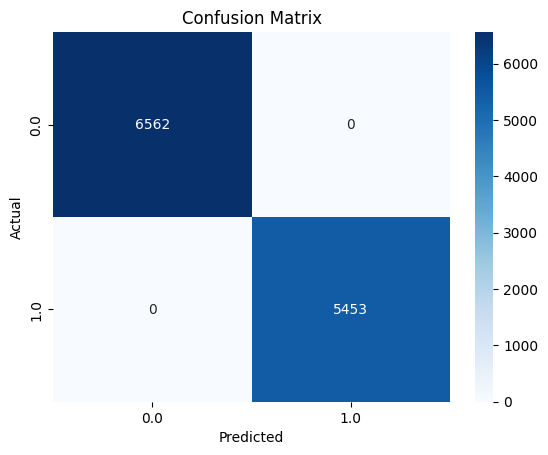

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert predictions_eval to Pandas DataFrame for visualization
predictions_pd = predictions_eval.toPandas()

# Confusion Matrix Visualization
conf_matrix_pd = predictions_pd.groupby(['MaritalStatus_indexed', 'prediction']).size().unstack().fillna(0)
sns.heatmap(conf_matrix_pd, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

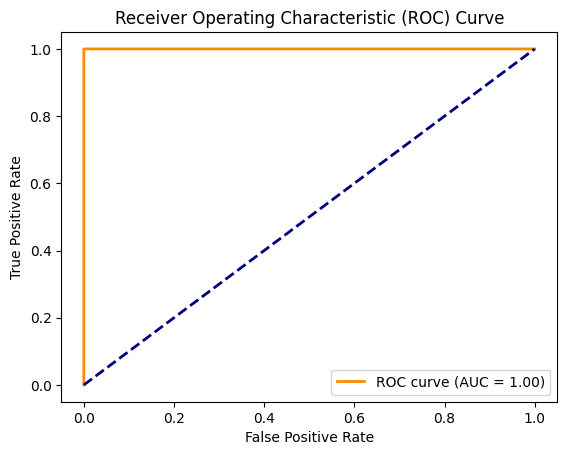

In [ ]:
from sklearn.metrics import roc_curve, auc

# Convert probability column to Python list
probs = predictions_pd['probability'].apply(lambda x: x[1]).tolist()

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(predictions_pd['MaritalStatus_indexed'], probs)
roc_auc = auc(fpr, tpr)

# ROC Curve Visualization
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
